In [258]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import seaborn as sns

In [93]:
#file_csv = '/Users/jubba/Downloads/Which_Horse_Concat.csv'

In [ ]:
# df_raw_data = pd.read_csv('/Users/jubba/which_horse/raw_data/combined_flat2_csv.csv')
# df_raw_data

In [316]:
from pipeline_cleaning import clean_data, transforming_data
df_raw_data = pd.read_csv('/Users/jubba/which_horse/raw_data/merge_dfs.csv')
df_cleaned = clean_data(df_raw_data.copy())
df_transformed_train, df_transformed_val, df_transformed_test = transforming_data(df_cleaned.copy())

/var/folders/y1/7l27jzt92cs7ljtj5xn5sd3h0000gn/T/ipykernel_13246/2299925250.py:2: DtypeWarning: Columns (53,62,71,80,89,98,107,116,122,123) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw_data = pd.read_csv('/Users/jubba/which_horse/raw_data/merge_dfs.csv')
/Users/jubba/which_horse/notebook/pipeline_cleaning.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['failed_to_finish_reason'] = df['failed_to_finish_reason'].apply(lambda x: 0 if pd.isna(x) else 1)
/Users/jubba/which_horse/notebook/pipeline_cleaning.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [311]:
df_transformed_train.columns

Index(['barrier_1', 'barrier_2', 'barrier_3', 'barrier_4', 'barrier_5',
       'barrier_6', 'barrier_7', 'barrier_8', 'barrier_9', 'barrier_10',
       'barrier_11', 'barrier_12', 'barrier_13', 'barrier_14', 'barrier_15',
       'barrier_16', 'barrier_17', 'barrier_18', 'barrier_19', 'barrier_20',
       'track_condition_FAST', 'track_condition_FIRM', 'track_condition_GOOD',
       'track_condition_GOOD TO FIRM', 'track_condition_GOOD TO SOFT',
       'track_condition_HEAVY', 'track_condition_SOFT',
       'track_condition_STANDARD', 'track_condition_STANDARD TO FAST',
       'track_condition_STANDARD TO SLOW', 'race_type_NATIONAL_HUNT_FLAT',
       'track_type_TURF', 'race_class_normalised_Claiming',
       'race_class_normalised_Conditions', 'race_class_normalised_Grade 1',
       'race_class_normalised_Grade 2', 'race_class_normalised_Group 1',
       'race_class_normalised_Group 2', 'race_class_normalised_Group 3',
       'race_class_normalised_Handicap', 'race_class_normalised_Lis

In [322]:
columns_to_convert_cat = ['barrier_1', 'barrier_2', 'barrier_3', 'barrier_4', 'barrier_5',
       'barrier_6', 'barrier_7', 'barrier_8', 'barrier_9', 'barrier_10',
       'barrier_11', 'barrier_12', 'barrier_13', 'barrier_14', 'barrier_15',
       'barrier_16', 'barrier_17', 'barrier_18', 'barrier_19', 'barrier_20',
       'track_condition_FAST', 'track_condition_FIRM', 'track_condition_GOOD',
       'track_condition_GOOD TO FIRM', 'track_condition_GOOD TO SOFT',
       'track_condition_HEAVY', 'track_condition_SOFT',
       'track_condition_STANDARD', 'track_condition_STANDARD TO FAST',
       'track_condition_STANDARD TO SLOW', 'race_type_NATIONAL_HUNT_FLAT',
       'track_type_TURF', 'race_class_normalised_Claiming',
       'race_class_normalised_Conditions', 'race_class_normalised_Grade 1',
       'race_class_normalised_Grade 2', 'race_class_normalised_Group 1',
       'race_class_normalised_Group 2', 'race_class_normalised_Group 3',
       'race_class_normalised_Handicap', 'race_class_normalised_Listed',
       'race_class_normalised_Maiden', 'race_class_normalised_Novice',
       'race_class_normalised_Selling', 'race_class_1', 'race_class_2',
       'race_class_3', 'race_class_4', 'race_class_5', 'race_class_6']


In [326]:
columns_to_convert_num = ['distance', 'total_prize_money', 'jockey_allowance',
                'handicap_weight', 'dslr', 'official rating', 'wfa',
                'weight_adjustment', 'betfair_starting_price',
                'pre_race_master_rating_int', 'starting_price', 'current_age']

In [ ]:
win_or_lose,
gear,
id_lewagon,
Place,
RunnersOffR,
Min Price,
Max Price
BSP:
15 Mins:
10 mins:
5 mins:
3 mins:
2 mins:
1 min
Post Time:
Last Traded Price:

In [327]:
df_transformed_train[columns_to_convert_num] = df_transformed_train[columns_to_convert_num].astype(int)

In [323]:
df_transformed_train[columns_to_convert_cat] = df_transformed_train[columns_to_convert_cat].astype(float)

In [35]:
#classifcation X and Y
#X = df.drop(columns=['win_or_lose', 'date', 'birth_date', 'finish_position', 'failed_to_finish_reason'])
#y = df['win_or_lose']

In [36]:
# Regression X and Y
#X = df.drop(columns=['betfair_starting_price', 'date', 'birth_date'])
#y = df['betfair_starting_price']

NameError: name 'df' is not defined

In [ ]:
# #temporary drop, values will be imputed


In [ ]:
#X['margin'].isnull().sum()

In [ ]:
#X.columns[X.isna().any()]

In [ ]:
#list(X.isnull().sum())

In [ ]:
#y = y.replace({0.5 : 1})

In [41]:
'''mask_1 = df_raw_data['win_or_lose'] == 1
print(mask_1.sum())
mask_0 = df_raw_data['win_or_lose'] == 0
print(mask_0.sum())
wins = 23087
loses = 184016
print(wins / (wins+loses) * 100)
print(loses / (wins+loses) * 100)'''

15350
112256
11.147593226558765
88.85240677344125


In [42]:
#import matplotlib.pyplot as plt

Text(0, 0.5, 'Count')

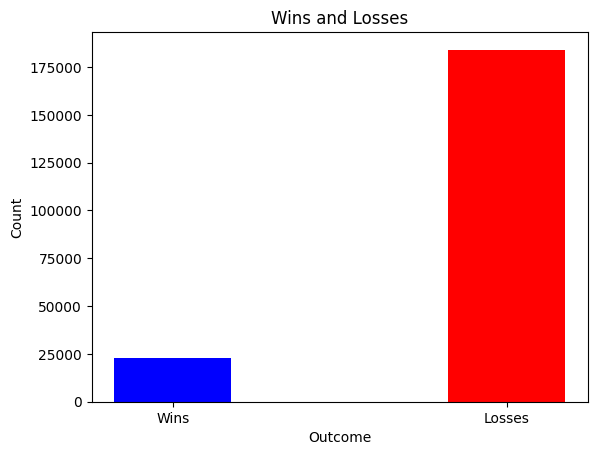

In [73]:
categories = ['Wins', 'Losses']
values = [wins, loses]
bar_width = 0.35
bar_positions =[0,1]
plt.bar(bar_positions, values, bar_width, color=['blue', 'red'], tick_label = categories)
plt.title('Wins and Losses')
plt.xlabel('Outcome')
plt.ylabel('Count')

MISSING DATA AND RAW DATA SET

Text(0.5, 0, 'count')

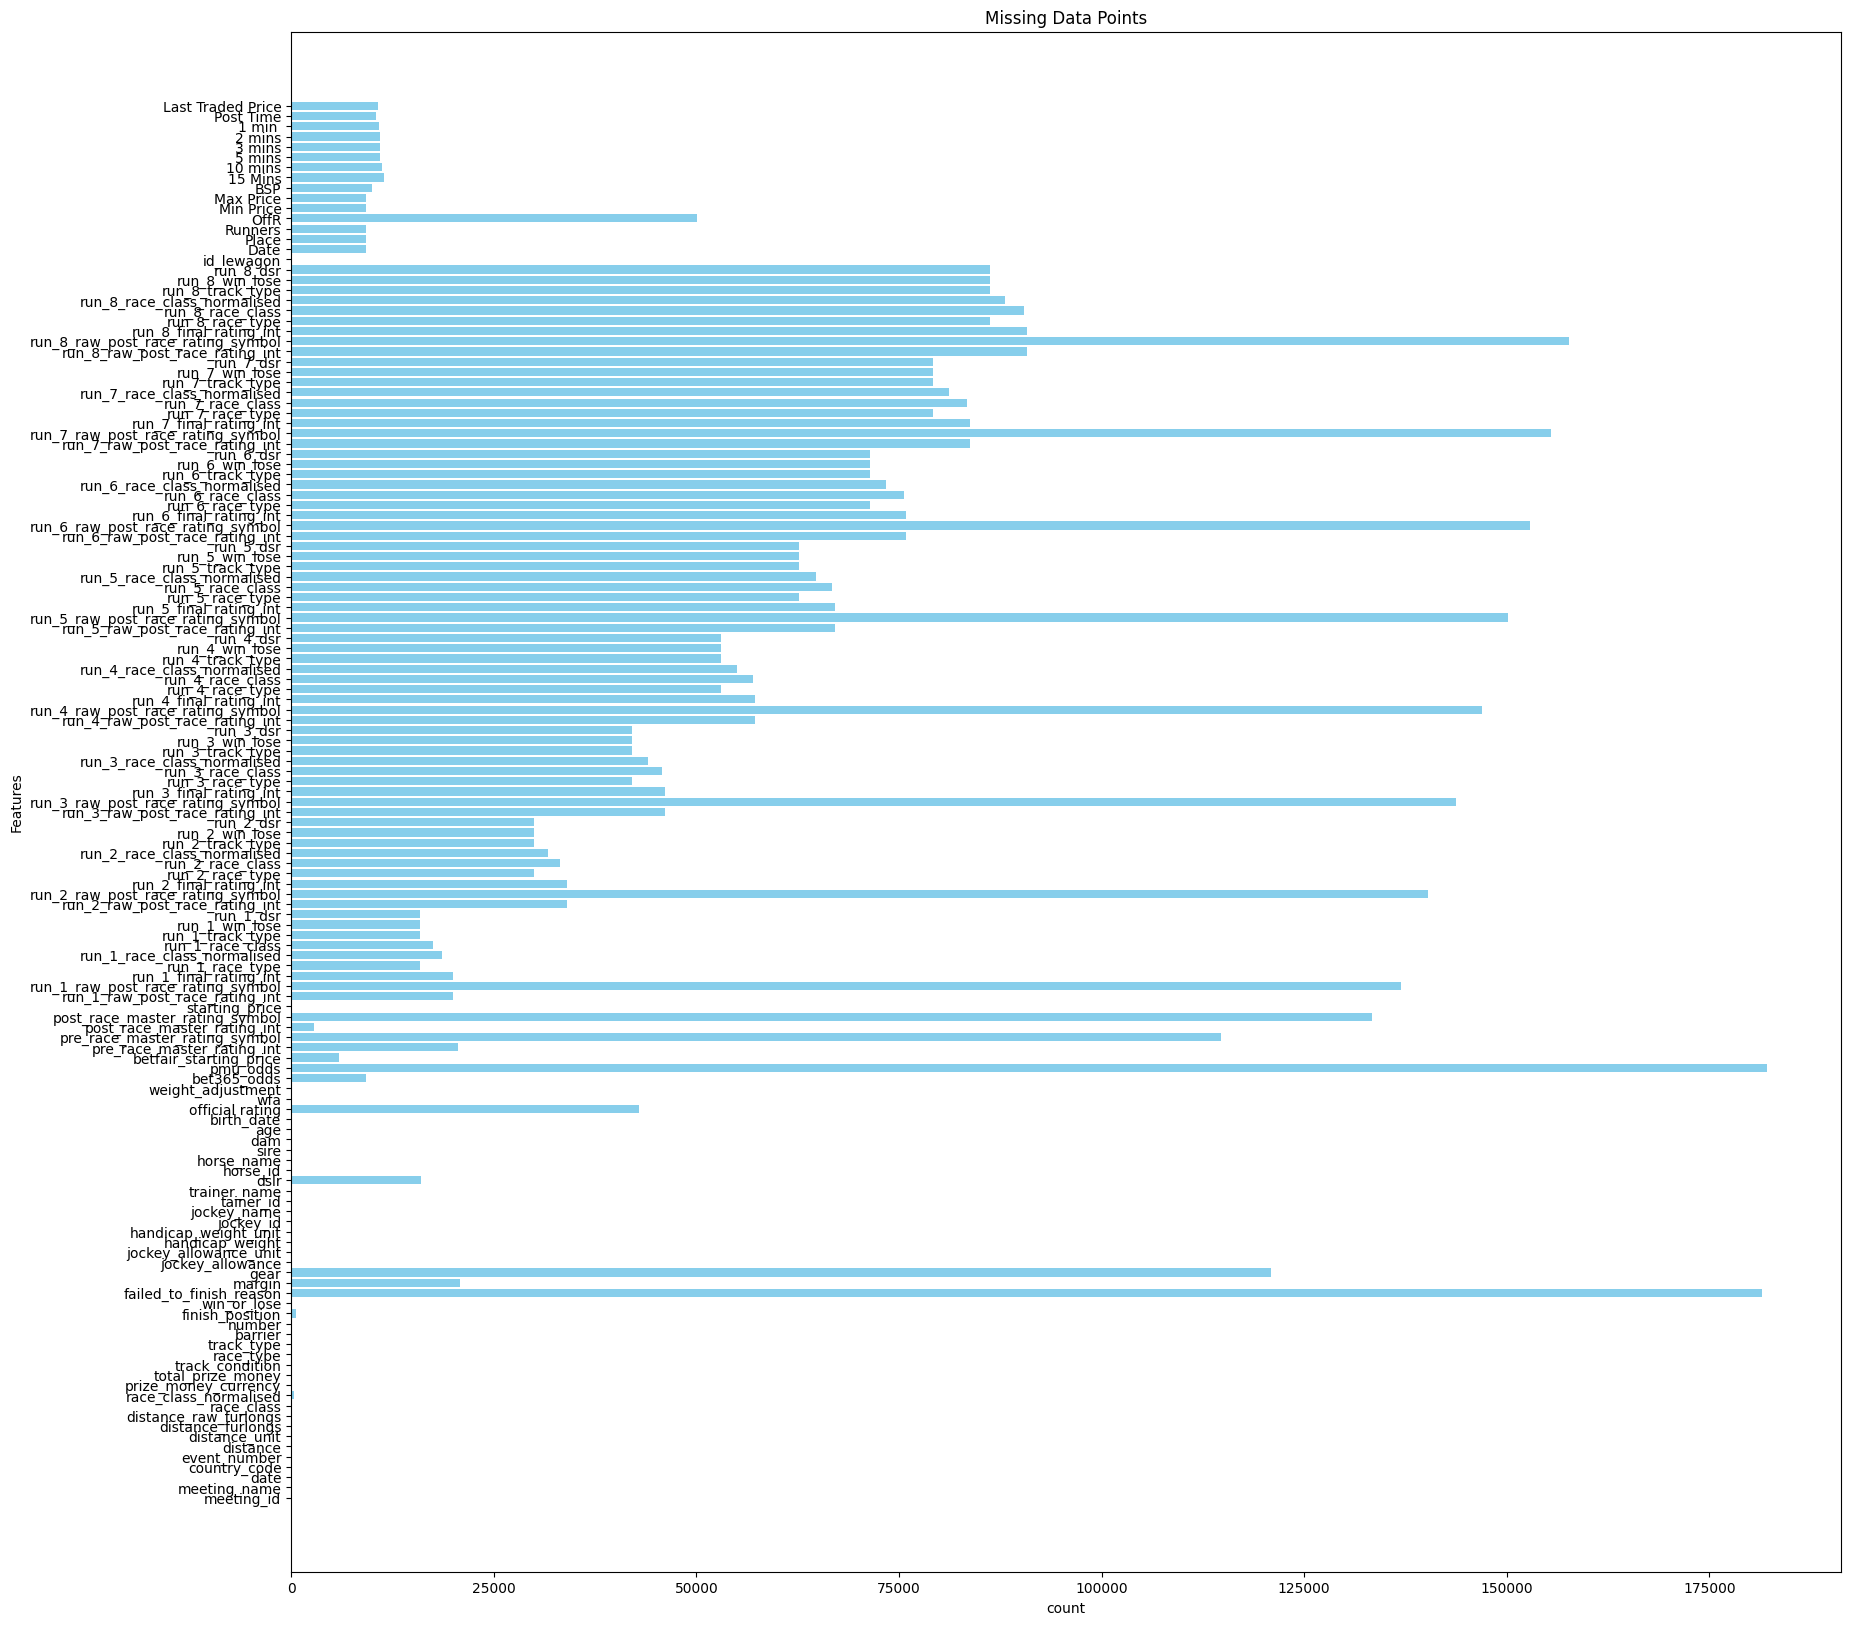

In [261]:
missing_values_dict = dict(df_raw_data.isnull().sum())
features = list(missing_values_dict.keys())
missing_counts = list(missing_values_dict.values())
plt.figure(figsize=(20, 20))
plt.barh(features, missing_counts, color='skyblue')
plt.title('Missing Data Points')
plt.ylabel('Features')
plt.xlabel('count')

In [119]:
df_raw_data_wins = df_raw_data[df_raw_data['win_or_lose'] == 1]

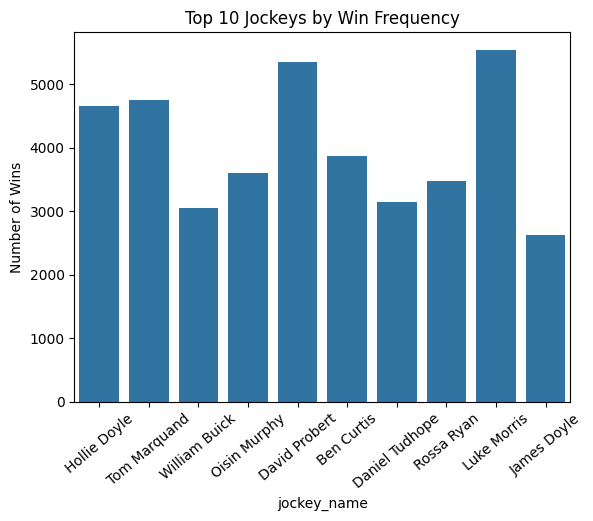

In [161]:
sns.countplot(data=df_raw_data, x='jockey_name', order=df_raw_data_wins['jockey_name'].value_counts().index[:10])
plt.title('Top 10 Jockeys by Win Frequency')
plt.xlabel('jockey_name')
plt.ylabel('Number of Wins')
plt.xticks(rotation=40)
plt.show()

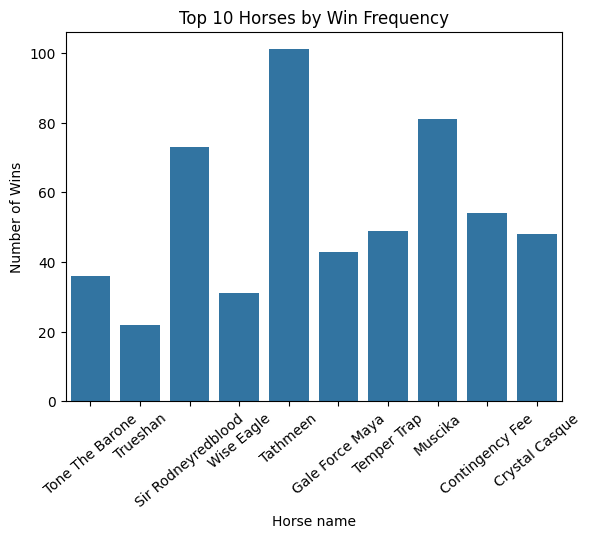

In [163]:
sns.countplot(data=df_raw_data, x='horse_name', order=df_raw_data_wins['horse_name'].value_counts().index[:10])
plt.title('Top 10 Horses by Win Frequency')
plt.xlabel('Horse name')
plt.ylabel('Number of Wins')
plt.xticks(rotation=40)
plt.show()

In [ ]:
df_raw_data.groupby(by=['horse_name']).agg({'win_or_lose': 'sum', 'horse_id': 'count'}).sort_values(by='win_or_lose', ascending=False).head(10)#.plot(kind='bar')

In [ ]:
df_cleaned.columns

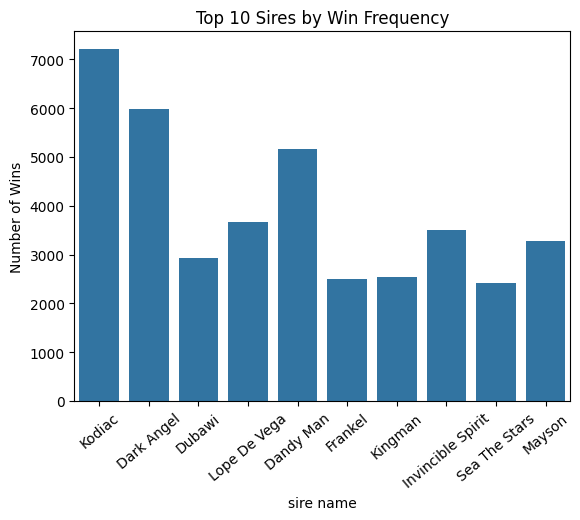

In [169]:
sns.countplot(data=df_raw_data, x='sire', order=df_raw_data_wins['sire'].value_counts().index[:10])
plt.title('Top 10 Sires by Win Frequency')
plt.xlabel('sire name')
plt.ylabel('Number of Wins')
plt.xticks(rotation=40)
plt.show()

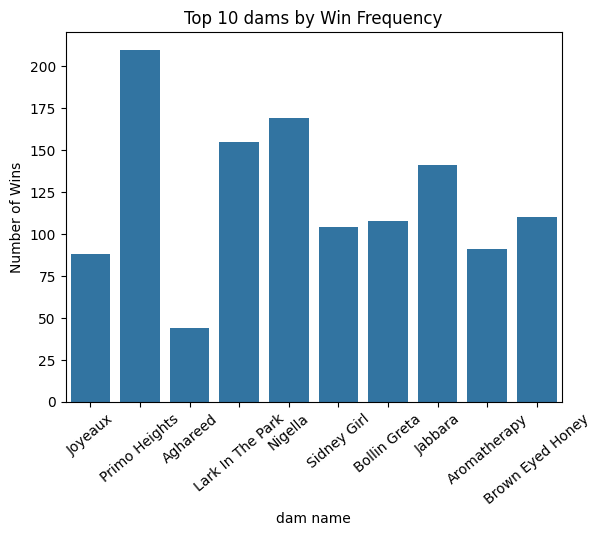

In [173]:
sns.countplot(data=df_raw_data, x='dam', order=df_raw_data_wins['dam'].value_counts().index[:10])
plt.title('Top 10 dams by Win Frequency')
plt.xlabel('dam name')
plt.ylabel('Number of Wins')
plt.xticks(rotation=40)
plt.show()

In [166]:
#we have no performance metric as a feature

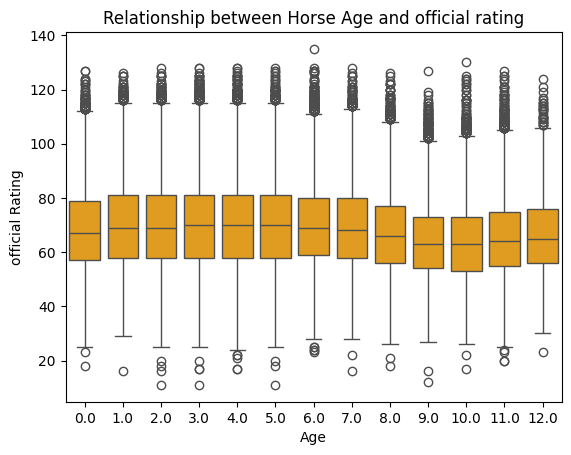

In [177]:
sns.boxplot(data=df_cleaned, x='current_age', y='official rating', color='orange')
plt.title('Relationship between Horse Age and official rating')
plt.xlabel('Age')
plt.ylabel('official Rating')
plt.show()

In [263]:
df_cleaned.columns

Index(['date', 'event_number', 'distance', 'race_class',
       'race_class_normalised', 'total_prize_money', 'track_condition',
       'race_type', 'track_type', 'barrier', 'finish_position', 'win_or_lose',
       'margin', 'gear', 'jockey_allowance', 'handicap_weight', 'jockey_id',
       'tainer_id', 'dslr', 'official rating', 'wfa', 'weight_adjustment',
       'betfair_starting_price', 'pre_race_master_rating_int',
       'starting_price', 'id_lewagon', 'Date', 'Place', 'Runners', 'OffR',
       'Min Price', 'Max Price', 'BSP', '15 Mins', '10 mins', '5 mins',
       '3 mins', '2 mins', '1 min ', 'Post Time', 'Last Traded Price',
       'current_age'],
      dtype='object')

/var/folders/y1/7l27jzt92cs7ljtj5xn5sd3h0000gn/T/ipykernel_13246/1013879154.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, data=df_subset, palette='viridis')
/var/folders/y1/7l27jzt92cs7ljtj5xn5sd3h0000gn/T/ipykernel_13246/1013879154.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, data=df_subset, palette='viridis')
/var/folders/y1/7l27jzt92cs7ljtj5xn5sd3h0000gn/T/ipykernel_13246/1013879154.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, data=df_subset, palette='viridis')
/var/folders/y1/7l27jz

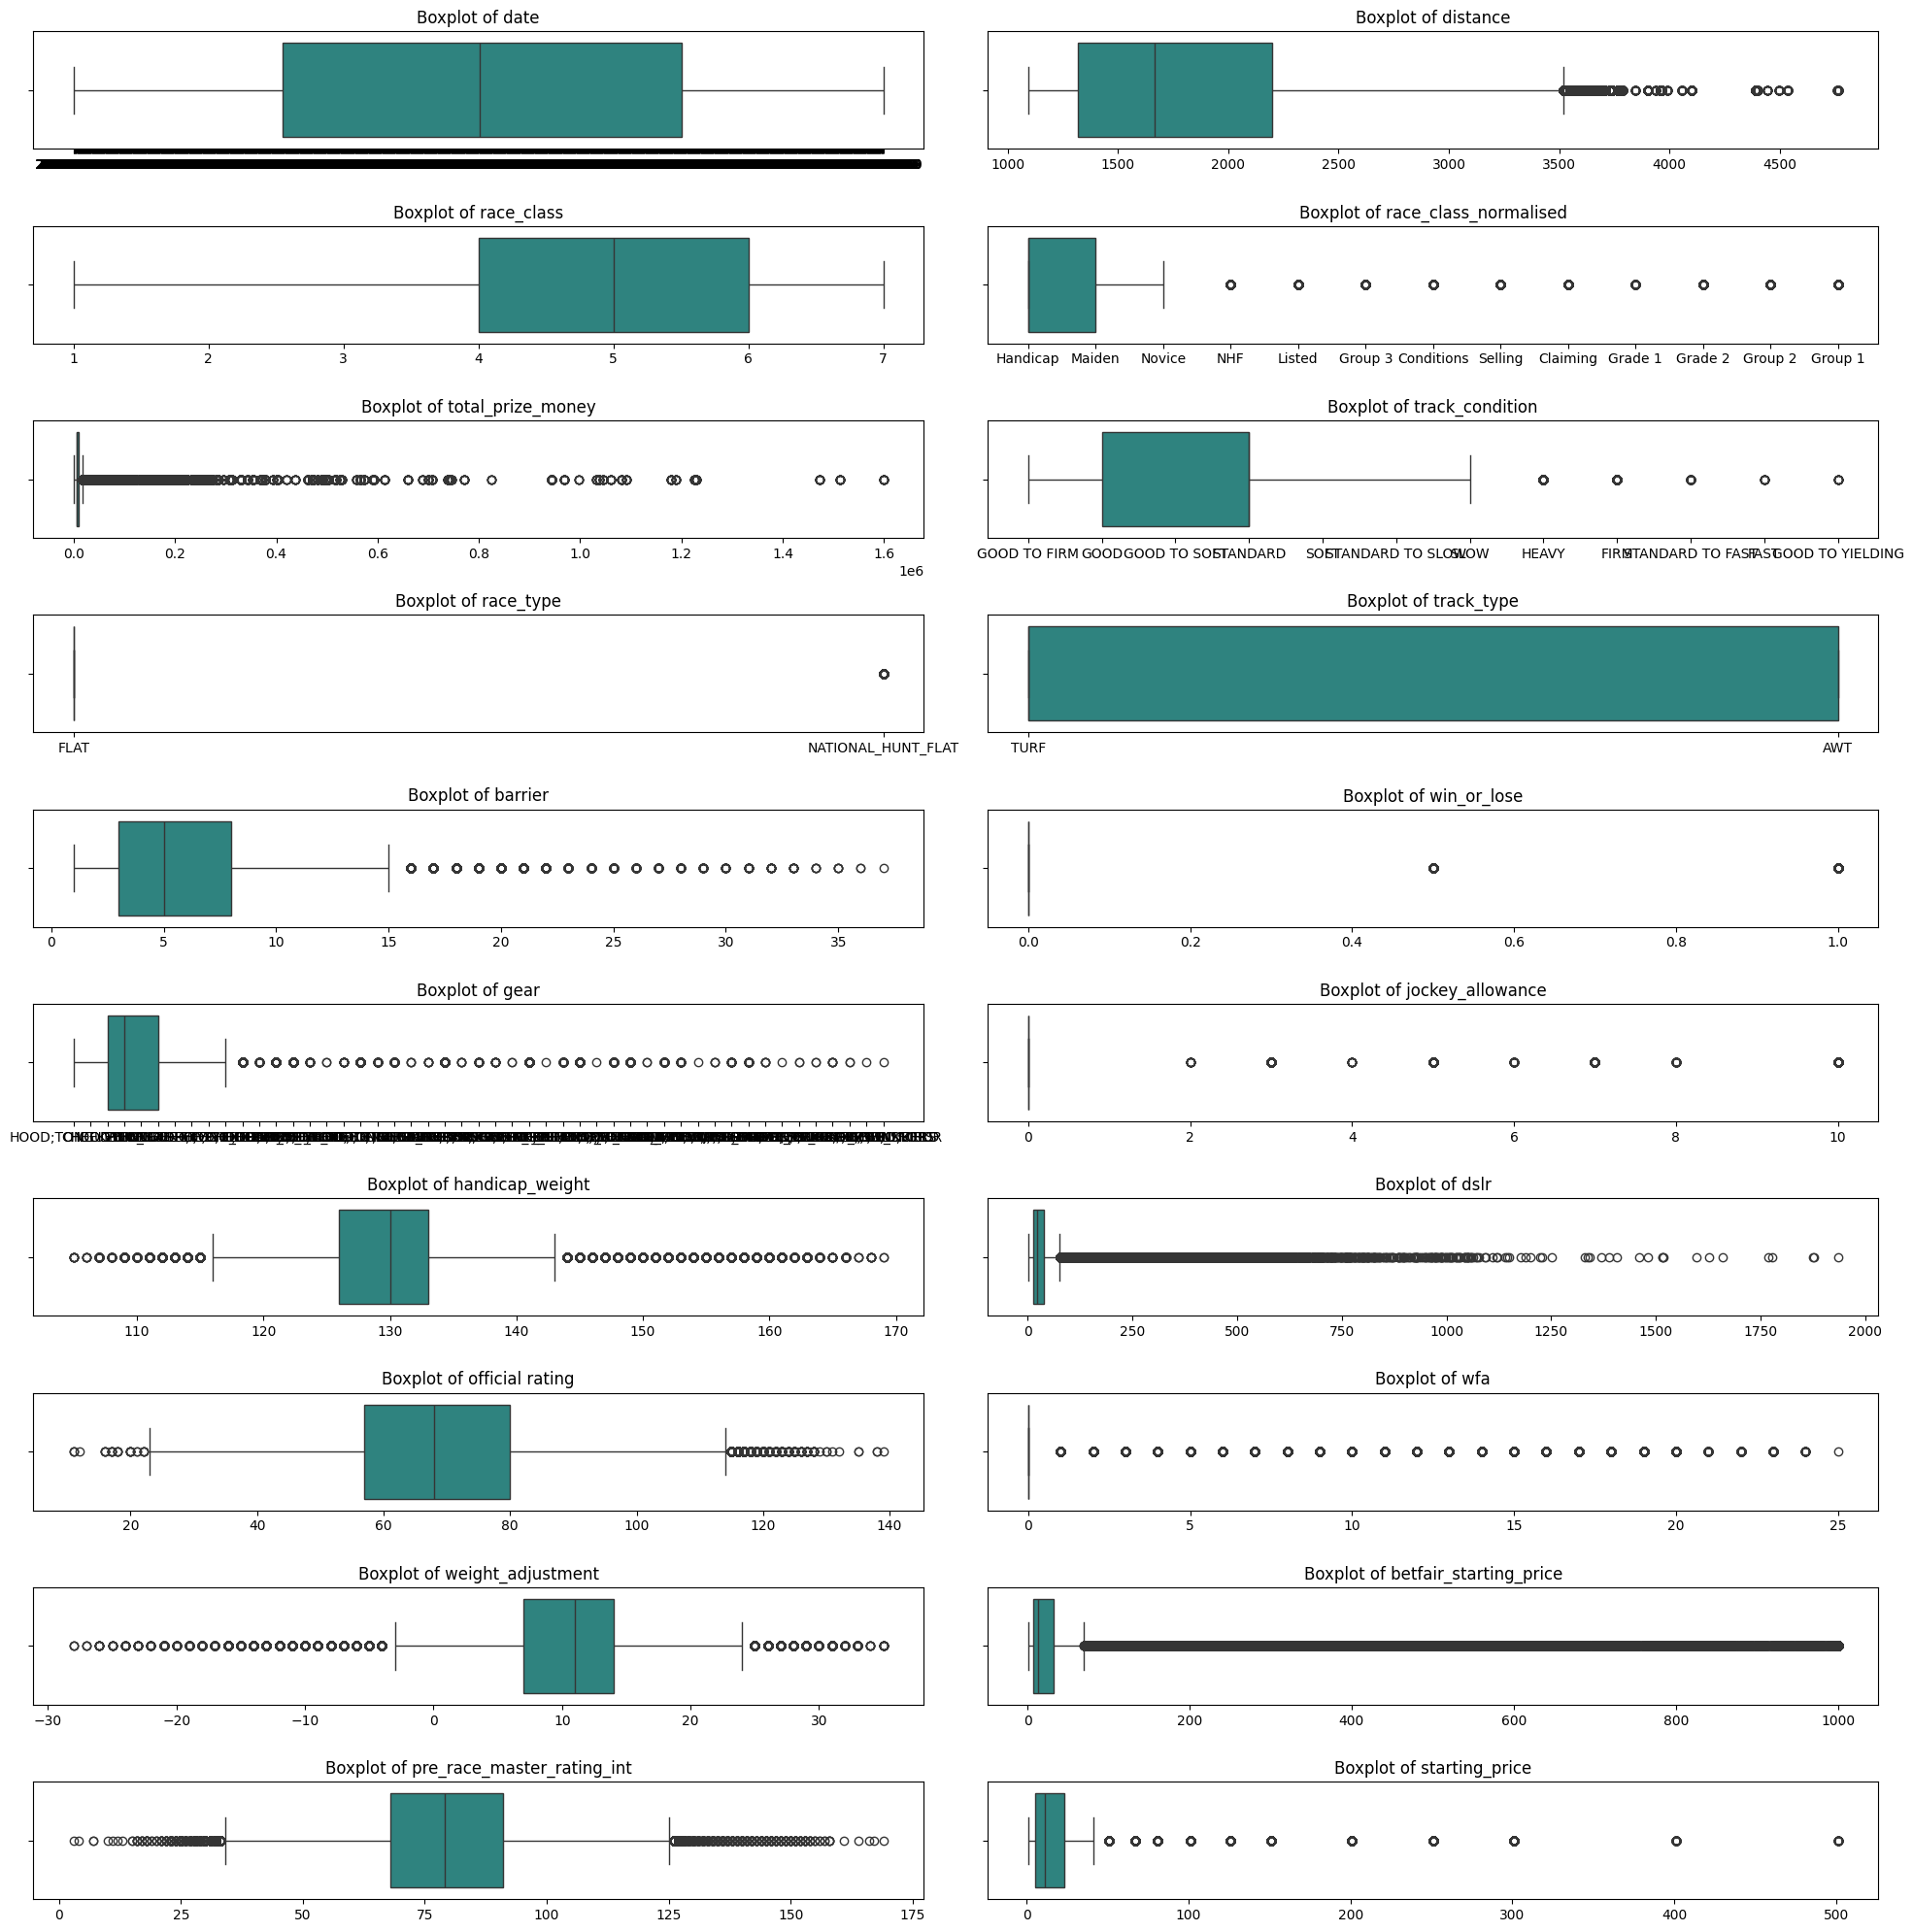

In [156]:
relevant_features = ['date', 'distance', 'race_class', 'race_class_normalised',
       'total_prize_money', 'track_condition', 'race_type', 'track_type',
       'barrier', 'win_or_lose', 'gear', 'jockey_allowance', 'handicap_weight',
       'dslr', 'official rating', 'wfa', 'weight_adjustment',
       'betfair_starting_price', 'pre_race_master_rating_int',
       'starting_price']
df_subset = df_raw_data[relevant_features]
plt.figure(figsize=(20, 20))
for i, feature in enumerate(relevant_features):
    plt.subplot(10, 2, i + 1)
    sns.boxplot(x=feature, data=df_subset, palette='viridis')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel('')
plt.tight_layout()
plt.show()


/var/folders/y1/7l27jzt92cs7ljtj5xn5sd3h0000gn/T/ipykernel_13246/3953490015.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, data=df_subset, palette='Set2')
/var/folders/y1/7l27jzt92cs7ljtj5xn5sd3h0000gn/T/ipykernel_13246/3953490015.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, data=df_subset, palette='Set2')
/var/folders/y1/7l27jzt92cs7ljtj5xn5sd3h0000gn/T/ipykernel_13246/3953490015.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, data=df_subset, palette='Set2')
/var/folders/y1/7l27jzt92cs7ljt

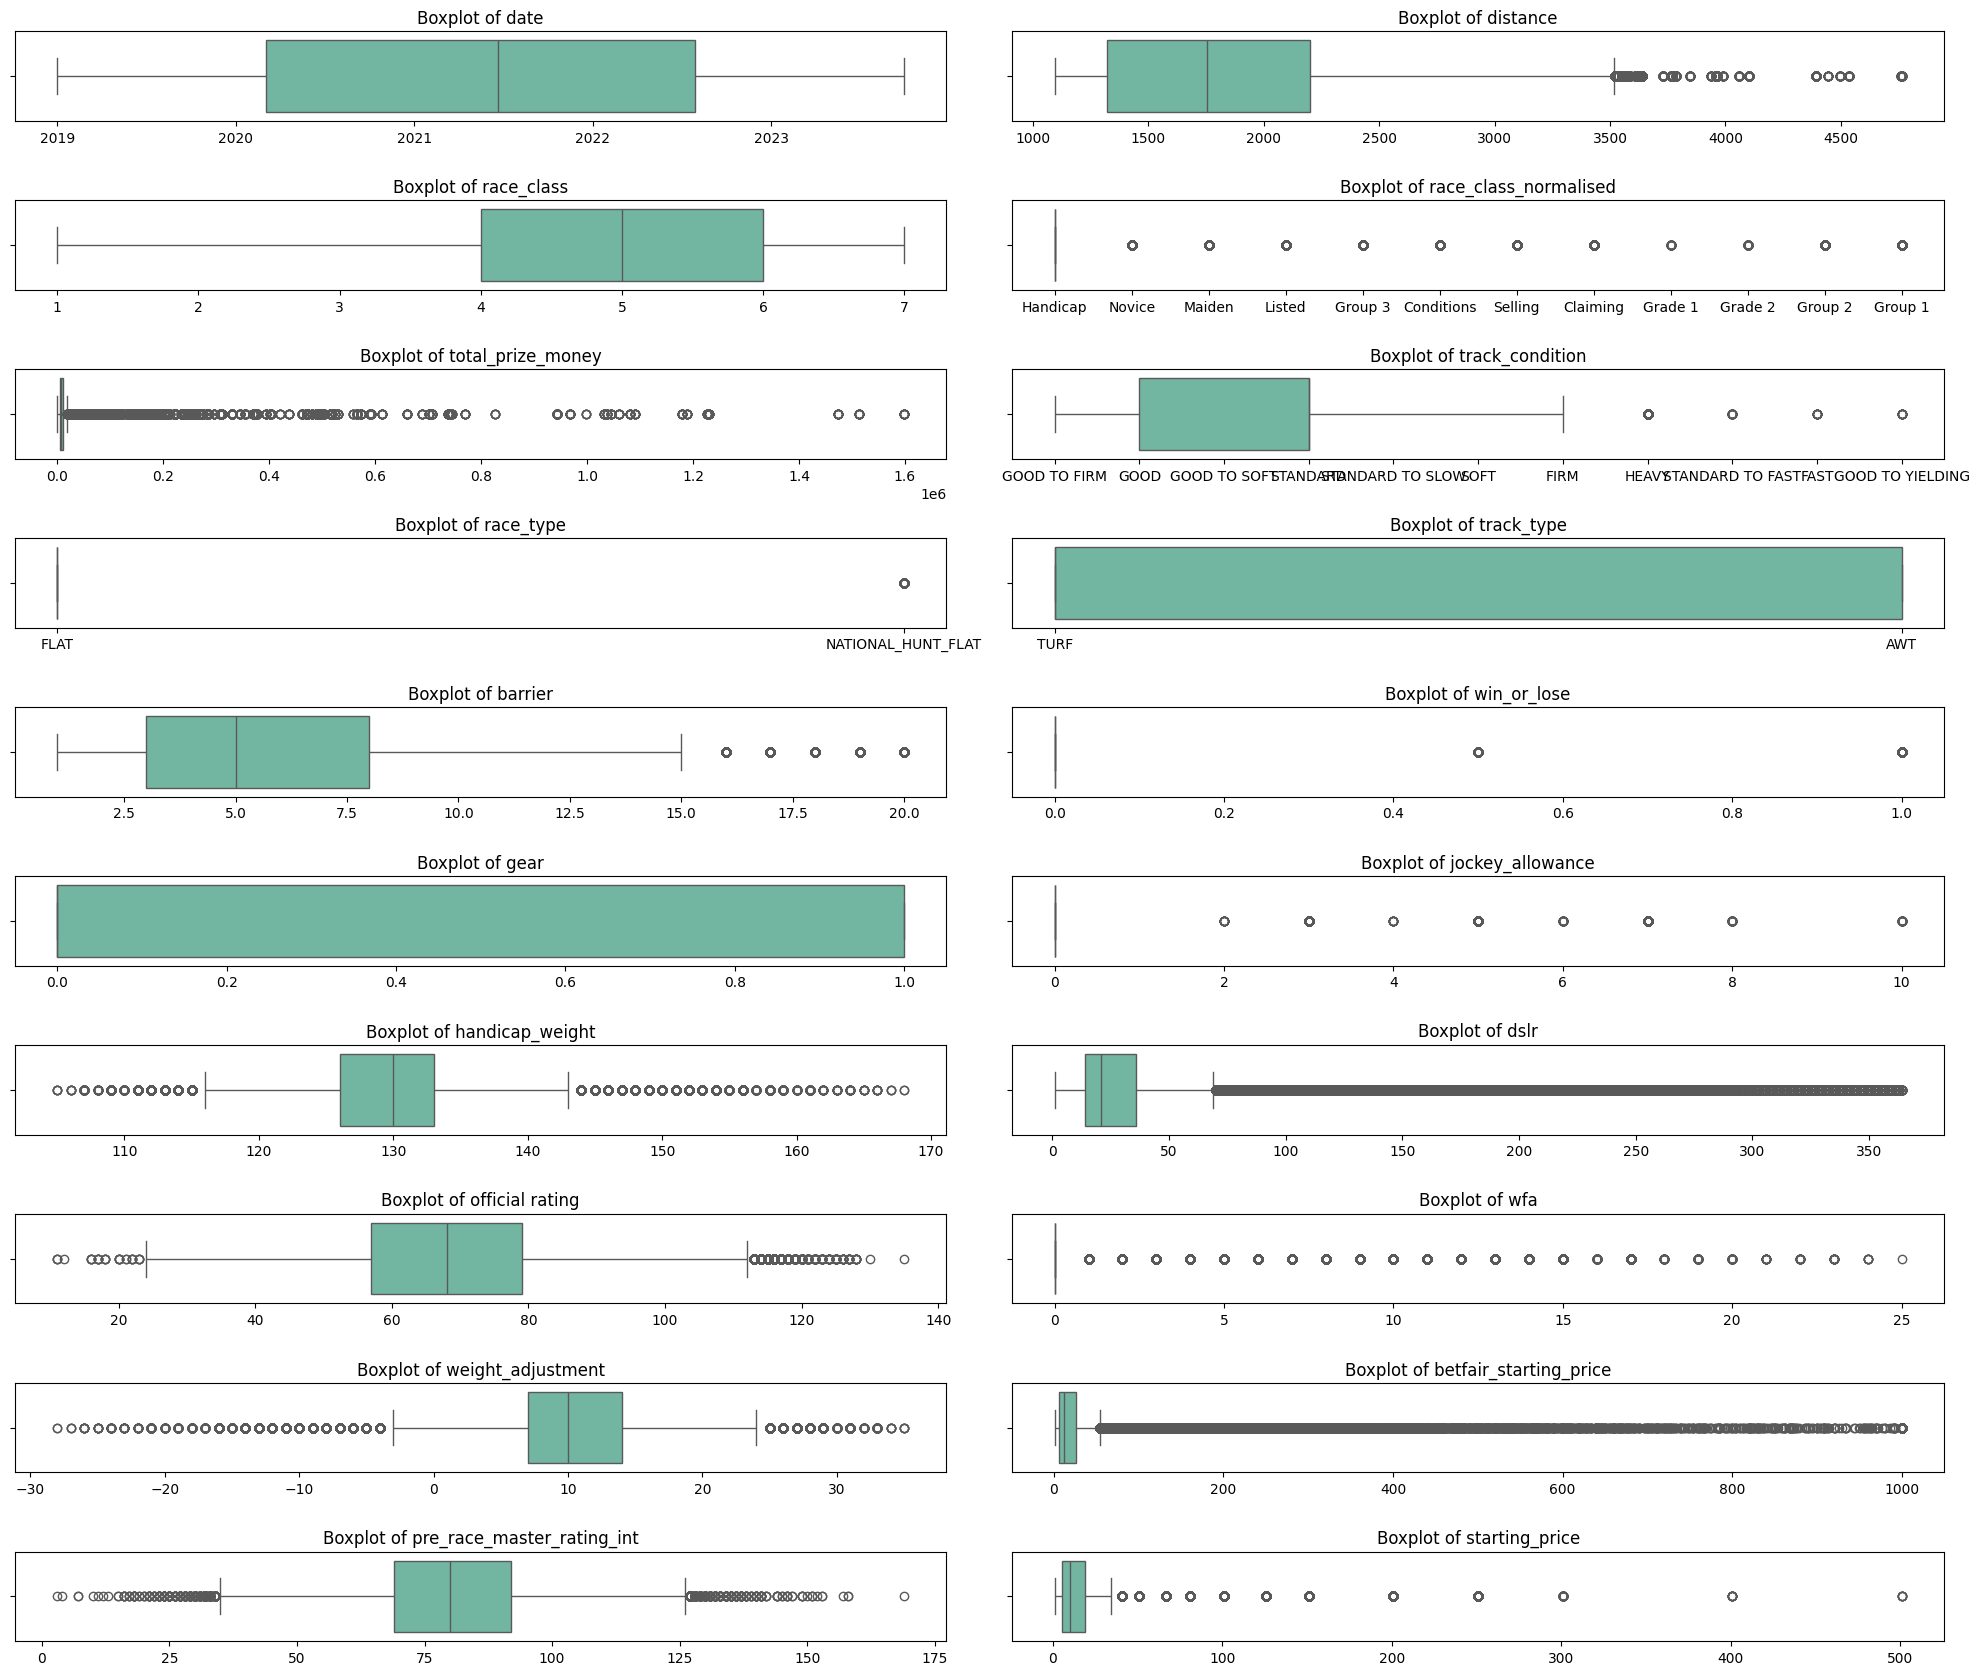

In [160]:
relevant_features = ['date', 'distance', 'race_class', 'race_class_normalised',
       'total_prize_money', 'track_condition', 'race_type', 'track_type',
       'barrier', 'win_or_lose', 'gear', 'jockey_allowance', 'handicap_weight',
       'dslr', 'official rating', 'wfa', 'weight_adjustment',
       'betfair_starting_price', 'pre_race_master_rating_int',
       'starting_price']
df_subset = df_cleaned[relevant_features]
plt.figure(figsize=(20, 20))
for i, feature in enumerate(relevant_features):
    plt.subplot(12, 2, i + 1)
    sns.boxplot(x=feature, data=df_subset, palette='Set2')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel('')
plt.tight_layout()
plt.show()

In [264]:
correlation_matrix = df_raw_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'PONTEFRACT'

In [186]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [182]:
df_cleaned.columns

Index(['date', 'distance', 'race_class', 'race_class_normalised',
       'total_prize_money', 'track_condition', 'race_type', 'track_type',
       'barrier', 'win_or_lose', 'gear', 'jockey_allowance', 'handicap_weight',
       'dslr', 'official rating', 'wfa', 'weight_adjustment',
       'betfair_starting_price', 'pre_race_master_rating_int',
       'starting_price', 'current_age'],
      dtype='object')

In [ ]:
df_cleaned[df_cleaned]

In [232]:
X = df_cleaned[['distance',
       'total_prize_money',
       'barrier', 'win_or_lose', 'gear', 'jockey_allowance',
       'dslr', 'official rating', 'wfa', 'weight_adjustment',
       'betfair_starting_price', 'pre_race_master_rating_int',
       'starting_price']]

206188

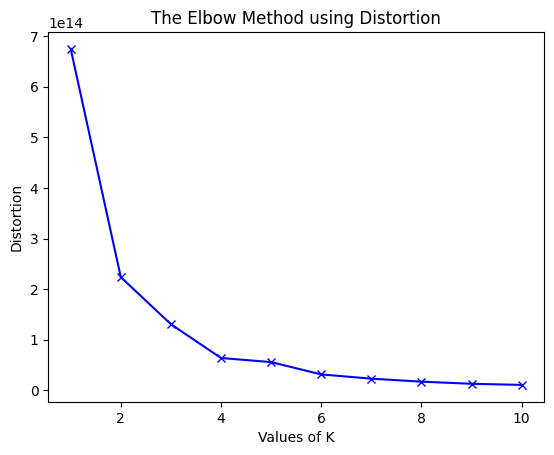

In [223]:
inertia = []
distortions = []
for k in range(1, 11, 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
plt.plot(range(1,11), inertia, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [208]:
distortions

[18402.134591937833,
 13442.487053498282,
 12106.153468312024,
 7787.768803002705,
 7537.715472512508,
 5985.665062353098,
 5325.666131199504,
 4260.460148266123,
 4123.740400701159,
 3459.5643644751653]

In [207]:
inertia

[674530856268194.0,
 223720529230918.1,
 130756104611166.22,
 64013332473042.2,
 55927704796876.67,
 31595781637474.67,
 23210671092571.12,
 17276262821038.508,
 13127244188963.309,
 10843328632285.355]

In [215]:
k

10

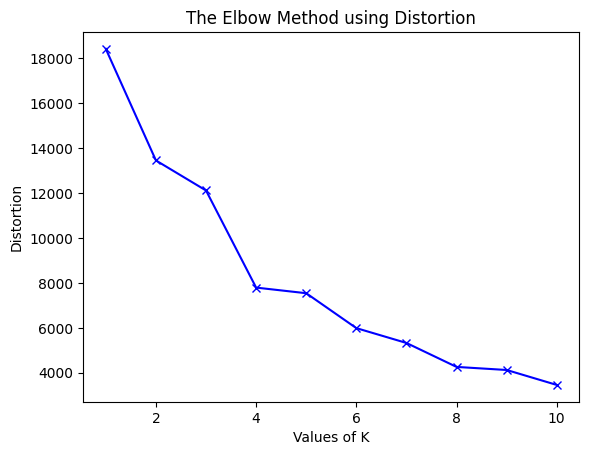

In [225]:
plt.plot(range(1,11), distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [227]:
inertia_values

[674530856268194.0]

In [238]:
X.iloc[:,0]

0         1100
1         1760
2         1760
3         1760
4         1760
          ... 
282000    1320
282001    1320
282002    1760
282003    1760
282004    1320
Name: distance, Length: 206188, dtype: int64

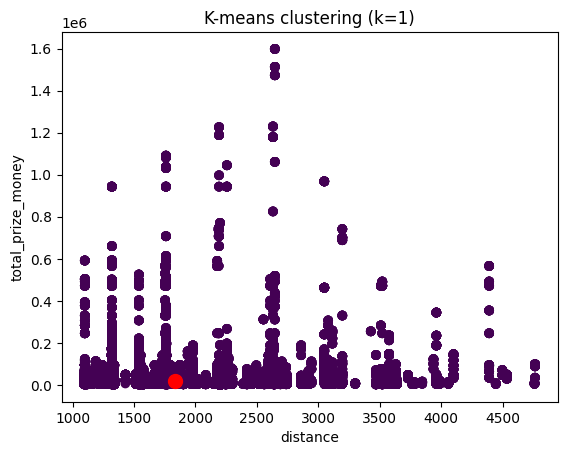

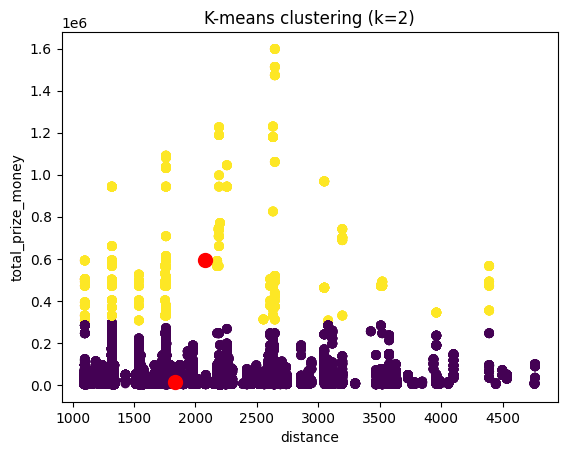

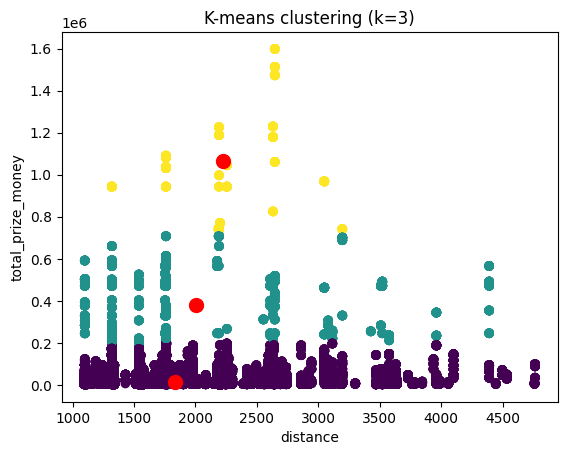

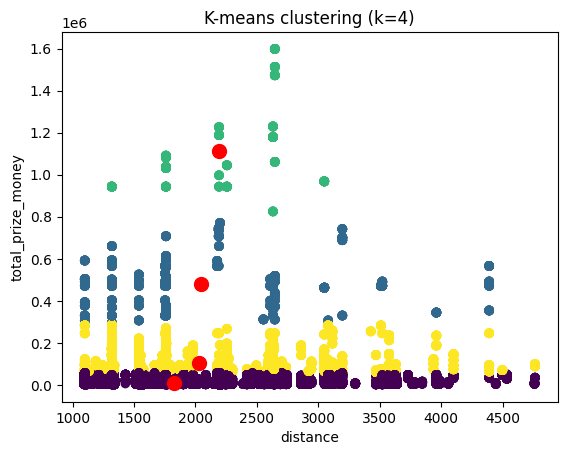

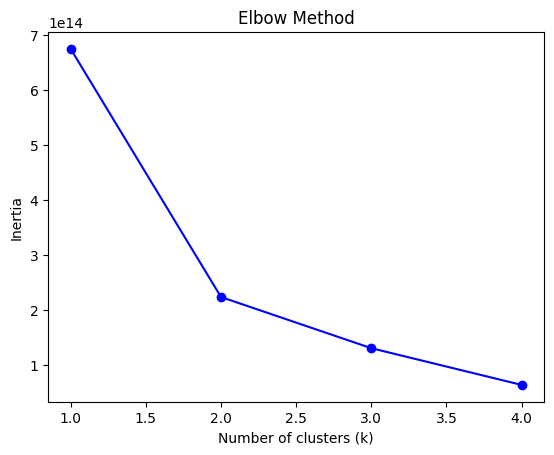

In [257]:

import matplotlib.pyplot as plt

k_range = range(1, 5)
inertia_values = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, \
                    init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    inertia_values.append(kmeans.inertia_)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans)
    plt.scatter(kmeans.cluster_centers_[:, 0],\
                kmeans.cluster_centers_[:, 1], \
                s=100, c='red')
    plt.title('K-means clustering (k={})'.format(k))
    plt.xlabel(f'{X.columns[0]}')
    plt.ylabel(f'{X.columns[1]}')
    plt.show()
plt.plot(k_range, inertia_values, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler # cant be used as too much data is loss
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN

In [ ]:
X.shape

NameError: name 'X' is not defined

In [ ]:
y.shape

(207214,)

In [ ]:
smote = SMOTE(random_state=42, k_neighbors=5, sampling_strategy=1, n_jobs=-1)
X_res, y_res = smote.fit_resample(X, y)

/Users/jubba/.pyenv/versions/3.10.6/envs/which_horse/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [ ]:
mask_win_synthetic = y_res == 1
print(mask_win_synthetic.sum())
mask_lose_synthetic = y_res == 0
print(mask_lose_synthetic.sum())


183293
183293


In [ ]:
y.nunique()

2

In [ ]:
X.columns

Index(['meeting_id', 'date', 'event_number', 'distance',
       'distance_raw_furlongs', 'total_prize_money', 'track_type', 'barrier',
       'number', 'finish_position', 'win_or_lose', 'failed_to_finish_reason',
       'margin', 'gear', 'jockey_allowance', 'handicap_weight', 'jockey_id',
       'tainer_id', 'dslr', 'horse_id', 'age', 'birth_date', 'official rating',
       'wfa', 'weight_adjustment', 'pre_race_master_rating_int',
       'starting_price', 'track_condition_FAST', 'track_condition_FIRM',
       'track_condition_GOOD', 'track_condition_GOOD TO FIRM',
       'track_condition_GOOD TO SOFT', 'track_condition_GOOD TO YIELDING',
       'track_condition_HEAVY', 'track_condition_SLOW', 'track_condition_SOFT',
       'track_condition_STANDARD', 'track_condition_STANDARD TO FAST',
       'track_condition_STANDARD TO SLOW', 'race_type_FLAT',
       'race_type_NATIONAL_HUNT_FLAT', 'race_class_1', 'race_class_2',
       'race_class_3', 'race_class_4', 'race_class_5', 'race_class_6',


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [328]:
X_train = df_transformed_train.drop(columns=['betfair_starting_price'])
X_test = df_transformed_test.drop(columns=['betfair_starting_price'])
y_train = df_transformed_train['betfair_starting_price']
y_test = df_transformed_test['betfair_starting_price']
#X_val = df_transformed_val[]
#y_val = df_transformed_val[]

In [ ]:
#xgbclassifierwere going to use becausewhethera horse loses or wins is biunary classificatiojn

In [266]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((54111, 79), (27388, 79), (54111,), (27388,))

In [ ]:
model = xgb.XGBClassifier(
    tree_method='hist',
    booster='gbtree',
    objective='reg:logistic',
    random_state=42,
    learning_rate=0.001,
    colsample_bytree=0.9,
    n_estimators=110,
    subsample=0.75
    )

In [ ]:
from keras.utils import get_custom_objects
import tensorflow as tf
from keras import backend as K
import numpy as np

In [308]:
X_train.dtypes

barrier_1            object
barrier_2            object
barrier_3            object
barrier_4            object
barrier_5            object
                      ...  
3 mins               object
2 mins               object
1 min                object
Post Time            object
Last Traded Price    object
Length: 79, dtype: object

In [36]:
y_train

NameError: name 'y_train' is not defined

In [ ]:
# def custom_loss_function(y_pred, y_true):


    # win_horse = y_true[:, 0]
    # win_odds = y_true[:, 1]
    # gain_loss_vector = win_horse * (win_odds - 1) + (1 - win_horse) * -1
    # y_true = y_true.reshape(-1,1)
    # return -0.1 * y_true * y_pred
    # return -0.1 * np.mean(np.sum(y_true * y_pred))
    #return -1 * tf.reduce_mean(tf.reduce_sum(gain_loss_vector * y_pred, axis=1))
    # gain_loss_vector = K.concatenate([win_horse * (win_odds - 1) + (1 - win_horse) * -1, -> profit or loss of winning/losing on a bet of £1
    # K.zeros_like(win_odds)], axis=1) -> this is padding as y_true is longer then y_pred


In [329]:
def custom_loss_function(y_true, y_pred):
  """Custom loss function for XGBoost with gradient and hessian.

  Args:
      y_true: Ground truth labels (numpy array).
      y_pred: Predicted values by the model (numpy array).

  Returns:
      grad: A numpy array of gradients for each data point.
      hess: A numpy array of hessians for each data point.
  """
  y_true = y_true.reshape(-1,1)
#   y_pred = y_pred.reshape(-1,1)
  loss = -0.1 * np.mean(y_true * y_pred, axis=0)  # Mean across features

  # Calculate gradients (assuming y_true has the same shape as y_pred)
  grad = -0.1 * y_true * np.mean(y_pred, axis=0)  # Mean across features

  # Calculate hessians (assuming y_true has the same shape as y_pred)
#   hess = 0.1 * np.mean(y_true**2, axis=0)  # Mean across features
#   hess = np.repeat(hess, len(grad))
  hess = 0.1 * np.square(y_true - np.mean(y_pred, axis=0))

  return grad, hess

In [330]:
model_regressor =xgb.XGBRegressor(
            objective=custom_loss_function,
            random_state=42,
            booster='gbtree',
            learning_rate=0.01,
            max_depth=3,
            min_child_weight=1,
            gamma=0.2,
            subsample=0.6,
            enable_categorical = True
                                )

In [35]:
X_train

NameError: name 'X_train' is not defined

In [331]:
model_regressor.fit(X_train, y_train)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:win_or_lose: object, gear: object, id_lewagon: object, Date: object, Place: object, Runners: object, OffR: object, Min Price: object, Max Price: object, BSP: object, 15 Mins: object, 10 mins: object, 5 mins: object, 3 mins: object, 2 mins: object, 1 min : object, Post Time: object, Last Traded Price: object

In [ ]:
len(y_test)

12194

In [ ]:
list(y_pred)

[1.2799871,
 1.2799871,
 0.26716232,
 0.26716232,
 1.2799871,
 0.26716232,
 0.26716232,
 0.26716232,
 0.2722605,
 0.26716232,
 1.2799871,
 0.26716232,
 0.2722605,
 0.608553,
 0.26716232,
 0.26716232,
 1.2799871,
 1.275924,
 0.2722605,
 0.26716232,
 0.26716232,
 0.3789862,
 0.26716232,
 0.37746617,
 0.27096397,
 0.26716232,
 0.26716232,
 0.26716232,
 0.27096397,
 0.608553,
 0.26716232,
 0.27096397,
 0.26716232,
 0.26864362,
 0.27096397,
 0.27096397,
 0.26716232,
 0.27096397,
 1.2799871,
 0.27096397,
 0.26716232,
 0.26716232,
 0.27096397,
 0.26716232,
 1.2799871,
 0.26716232,
 0.26716232,
 0.26716232,
 0.26716232,
 0.26716232,
 0.26716232,
 0.26716232,
 0.26716232,
 0.26716232,
 0.26864362,
 0.27096397,
 1.2799871,
 0.26716232,
 0.26716232,
 1.2799871,
 0.26716232,
 1.2799871,
 1.2799871,
 0.26716232,
 0.26716232,
 0.26716232,
 0.26716232,
 0.27096397,
 1.275924,
 1.2799871,
 0.26716232,
 0.3789862,
 0.26716232,
 0.26716232,
 0.26716232,
 0.26716232,
 0.37746617,
 0.26864362,
 0.7549487,

In [ ]:
import numpy as np

y_pred = model_regressor.predict(X_test)
np.unique(y_pred)

array([0.26716232, 0.26864362, 0.27096397, 0.2722605 , 0.37746617,
       0.3789862 , 0.5666086 , 0.608553  , 0.7549487 , 0.76715744,
       1.275924  , 1.2799871 ], dtype=float32)

In [ ]:
len(y_pred)


12194

In [ ]:
list(y_pred)

[19.781813,
 30.296232,
 16.057196,
 94.69511,
 16.912243,
 47.066338,
 30.296232,
 16.057196,
 16.057196,
 174.85587,
 16.912243,
 16.057196,
 16.057196,
 37.158813,
 16.057196,
 37.158813,
 53.801575,
 16.057196,
 73.148544,
 16.68122,
 264.58716,
 16.057196,
 26.170399,
 24.718222,
 33.150127,
 18.992563,
 16.190746,
 33.467533,
 16.057196,
 16.057196,
 16.057196,
 18.992563,
 16.057196,
 16.057196,
 24.718222,
 21.10041,
 16.057196,
 16.057196,
 22.835073,
 30.296232,
 22.835073,
 29.391014,
 16.057196,
 26.170399,
 18.115147,
 17.41692,
 18.992563,
 110.248695,
 26.170399,
 16.057196,
 30.296232,
 110.248695,
 18.992563,
 16.057196,
 16.057196,
 19.781813,
 73.148544,
 53.801575,
 17.41692,
 17.708601,
 24.718222,
 24.718222,
 18.115147,
 22.835073,
 16.057196,
 16.912243,
 22.835073,
 16.057196,
 16.057196,
 17.708601,
 22.835073,
 16.057196,
 16.190746,
 17.41692,
 53.801575,
 30.296232,
 24.718222,
 24.718222,
 16.057196,
 16.057196,
 22.835073,
 16.057196,
 16.057196,
 16.0571

In [ ]:
list(y_test)

[16.5,
 24.767291033,
 5.4,
 90.0,
 9.108286999581129,
 75.0,
 34.0,
 7.568147213861849,
 6.885064507,
 267.6007225124438,
 10.909007671896688,
 6.231465666422573,
 4.888689077180624,
 36.0,
 2.867075263,
 60.367872506,
 88.13115536217262,
 5.4,
 126.5303,
 10.0,
 330.0,
 5.1,
 25.0,
 23.0,
 45.8130323094636,
 20.474401067,
 9.491293245852289,
 30.0,
 8.534355028616993,
 2.32,
 8.10710447,
 11.54,
 7.750737656,
 2.904650386891608,
 19.42204,
 14.26449497279376,
 2.393072247,
 4.9,
 16.0,
 50.0,
 17.011553457,
 31.36083769427079,
 3.878235746478074,
 26.0,
 11.0,
 10.85303484969566,
 12.726299255,
 170.0,
 21.0,
 3.198529910320405,
 38.24050157,
 112.12214258478544,
 16.51228702331104,
 2.930549049,
 5.65878147,
 16.5,
 58.850090406,
 80.0,
 9.421818182829597,
 11.09184048341951,
 23.030318891,
 29.0,
 11.26413578959764,
 18.5,
 6.461530191,
 11.7593235,
 17.08934841281843,
 1.8059678528553056,
 6.0,
 11.0,
 22.0,
 6.4,
 8.93977465,
 11.5,
 68.02158711828034,
 32.0,
 19.62123184234388,


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy


ValueError: continuous is not supported

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
cv_results = cross_validate(model, X_train, y_train, cv=5)

In [ ]:
cv_results

{'fit_time': array([0.68410206, 0.66847014, 0.70612979, 0.69902897, 0.66795301]),
 'score_time': array([0.01481509, 0.01441979, 0.01542807, 0.01741695, 0.01682115]),
 'test_score': array([0.99933752, 0.99941546, 0.99922061, 0.99925958, 0.99925958])}

In [ ]:
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
param_grid = {
    'tree_method': ['exact', 'hist'],
    'booster': ['gbtree', 'dart'],
    'learning_rate' : [0.001, 0.01],
            }

In [ ]:
regressor_paramgrid = {
    'booster': ['gbtree'],
    'learning_rate': [0.01],
    'max_depth': [3],
    'min_child_weight': [1],
    'gamma': [0],
    'subsample': [0.6],
    'colsample_bytree': [0.6]
                      }

In [ ]:
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
grid_search_regressor = GridSearchCV(estimator=xgb_regressor, param_grid=regressor_paramgrid, cv=5, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1, verbose=3)
grid_search_regressor.fit(X_train, y_train)

NameError: name 'Gr' is not defined

In [ ]:
'''es = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=5,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
        )'''

"es = EarlyStopping(\n    monitor='val_accuracy',\n    min_delta=0,\n    patience=5,\n    verbose=0,\n    mode='auto',\n    baseline=None,\n    restore_best_weights=True,\n    start_from_epoch=0\n        )"

In [ ]:
xgb_classifier = xgb.XGBClassifier(objective='reg:logistic', random_state=42)
grid_search = GridSearchCV(estimator=xgb_classifier, refit='precision', param_grid= param_grid, cv=5, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 2/5] END booster=gbtree, learning_rate=0.001, tree_method=hist; accuracy: (test=0.999) precision: (test=1.000) recall: (test=0.999) total time=   3.2s
[CV 1/5] END booster=gbtree, learning_rate=0.001, tree_method=hist; accuracy: (test=0.999) precision: (test=1.000) recall: (test=0.999) total time=   3.4s
[CV 3/5] END booster=gbtree, learning_rate=0.001, tree_method=hist; accuracy: (test=0.999) precision: (test=1.000) recall: (test=0.999) total time=   3.2s
[CV 5/5] END booster=gbtree, learning_rate=0.001, tree_method=hist; accuracy: (test=0.999) precision: (test=1.000) recall: (test=0.999) total time=   3.2s
[CV 4/5] END booster=gbtree, learning_rate=0.001, tree_method=hist; accuracy: (test=0.999) precision: (test=1.000) recall: (test=0.999) total time=   3.4s
[CV 1/5] END booster=gbtree, learning_rate=0.01, tree_method=hist; accuracy: (test=0.999) precision: (test=1.000) recall: (test=0.999) total time=   3.0s
[CV 2/5] EN

/Users/jubba/.pyenv/versions/3.10.6/envs/which_horse/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 4/5] END booster=gbtree, learning_rate=0.01, tree_method=hist; accuracy: (test=0.999) precision: (test=1.000) recall: (test=0.999) total time=   3.0s
[CV 5/5] END booster=gbtree, learning_rate=0.01, tree_method=hist; accuracy: (test=0.999) precision: (test=1.000) recall: (test=0.999) total time=   2.9s
[CV 1/5] END booster=gbtree, learning_rate=0.01, tree_method=exact; accuracy: (test=0.999) precision: (test=1.000) recall: (test=0.999) total time=  51.8s
[CV 2/5] END booster=gbtree, learning_rate=0.001, tree_method=exact; accuracy: (test=0.999) precision: (test=1.000) recall: (test=0.999) total time=  52.0s
[CV 1/5] END booster=gbtree, learning_rate=0.001, tree_method=exact; accuracy: (test=0.999) precision: (test=1.000) recall: (test=0.999) total time=  52.2s
[CV 4/5] END booster=gbtree, learning_rate=0.001, tree_method=exact; accuracy: (test=0.999) precision: (test=1.000) recall: (test=0.999) total time=  53.1s
[CV 3/5] END booster=gbtree, learning_rate=0.001, tree_method=exact; 

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='reg:logistic', ...),
             n_jobs=-1,
             param_grid={'booster': ['gbtree', 'dart'],
                         'learning_rate': [0.001, 0.01],
                         'tree_method': ['exact', 'hist']},
             refit='precision', scoring=['accuracy', 'precision', 'recall'],
             verbose=3)

In [ ]:
'''
param_grid = {
    'tree_method': ['exact', 'approx', 'hist'],
    'booster': ['gbtree', 'dart'],
    'learning_rate' : [0.001, 0.01, 0.1],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'n_estimators': [100, 150, 200],
    'subsample': [0.7, 0.75, 0.8]
            }'''

"\nparam_grid = {\n    'tree_method': ['exact', 'approx', 'hist'],\n    'booster': ['gbtree', 'dart'],\n    'learning_rate' : [0.001, 0.01, 0.1],\n    'colsample_bytree': [0.8, 0.9, 1.0],\n    'n_estimators': [100, 150, 200],\n    'subsample': [0.7, 0.75, 0.8]\n            }"

In [ ]:
best_params = f"best_params {grid_search.best_params_}"
best_score = f"best_score {grid_search.best_score_}"
cv_results = grid_search.cv_results_

In [ ]:
best_params

"best_params {'booster': 'gbtree', 'learning_rate': 0.01, 'tree_method': 'exact'}"

In [ ]:
best_score

'best_score 0.9998984576342377'

In [ ]:
cv_results

{'mean_fit_time': array([ 52.71016111,   3.18339038,  51.03286939,   2.83630962,
        118.48912759, 426.11167603, 116.80519495, 354.89514737]),
 'std_fit_time': array([ 0.63412491,  0.09645775,  0.59963032,  0.06502486,  2.58601708,
         1.16071306,  2.58449758, 22.20054746]),
 'mean_score_time': array([0.11805797, 0.09797516, 0.10538454, 0.09140058, 1.71106033,
        1.342976  , 1.68586192, 0.83240185]),
 'std_score_time': array([0.02676029, 0.00765873, 0.00309493, 0.01481831, 0.1046494 ,
        0.11714216, 0.06817362, 0.04439406]),
 'param_booster': masked_array(data=['gbtree', 'gbtree', 'gbtree', 'gbtree', 'dart', 'dart',
                    'dart', 'dart'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.001, 0.001, 0.01, 0.01],
              mask=[False, False, False, False, False, False, False, False],
        fill_value

In [ ]:
print(cv_results)

{'mean_fit_time': array([ 23.71115322,   1.64435973,  25.06086516,   1.42902131,
        56.36529317, 259.8737062 ,  58.34771585, 223.33002462]), 'std_fit_time': array([ 0.96436945,  0.04567247,  0.3085668 ,  0.12016324,  1.75704057,
        0.47261534,  1.12486954, 11.10155684]), 'mean_score_time': array([0.06157198, 0.06458688, 0.06287384, 0.06085525, 1.03406153,
       0.71242743, 0.89523897, 0.46057835]), 'std_score_time': array([0.00931494, 0.00927424, 0.01264093, 0.00363337, 0.13719717,
       0.08998408, 0.10421476, 0.01487708]), 'param_booster': masked_array(data=['gbtree', 'gbtree', 'gbtree', 'gbtree', 'dart', 'dart',
                   'dart', 'dart'],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_learning_rate': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.001, 0.001, 0.01, 0.01],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
         

In [ ]:
cv_results.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_booster', 'param_learning_rate', 'param_tree_method', 'params', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy', 'split0_test_precision', 'split1_test_precision', 'split2_test_precision', 'split3_test_precision', 'split4_test_precision', 'mean_test_precision', 'std_test_precision', 'rank_test_precision', 'split0_test_recall', 'split1_test_recall', 'split2_test_recall', 'split3_test_recall', 'split4_test_recall', 'mean_test_recall', 'std_test_recall', 'rank_test_recall'])

In [ ]:
cv_results['mean_test_recall']

array([0.99876727, 0.99866585, 0.99877508, 0.99870486, 0.99876727,
       0.99866585, 0.99877508, 0.99870486])